# **Transfer Entropy: Mathematical Explanation**

Transfer Entropy (TE) is a non-parametric statistical measure that quantifies the directional flow of information between two stochastic processes. It is grounded in information theory and can be particularly useful in understanding causal relationships in time series data.

## **Mathematical Definition**

Given two stochastic processes $X$ and $Y$, the Transfer Entropy from $X$ to $Y$, denoted as $T_{X \to Y}$, is defined as:

$$
T_{X \to Y} = \sum P(y_{t+1}, y_t^{(k)}, x_t^{(l)}) \log \frac{P(y_{t+1} \mid y_t^{(k)}, x_t^{(l)})}{P(y_{t+1} \mid y_t^{(k)})}
$$

Here:
- $y_{t+1}$: The state of process $Y$ at time $t+1$.
- $y_t^{(k)} = (y_t, y_{t-1}, \dots, y_{t-k+1})$: The past $k$ states of $Y$ (history of $Y$).
- $x_t^{(l)} = (x_t, x_{t-1}, \dots, x_{t-l+1})$: The past $l$ states of $X$ (history of $X$).
- $P(y_{t+1}, y_t^{(k)}, x_t^{(l)})$: The joint probability distribution of $y_{t+1}$, $y_t^{(k)}$, and $x_t^{(l)}$.
- $P(y_{t+1} \mid y_t^{(k)}, x_t^{(l)})$: The conditional probability of $y_{t+1}$ given $y_t^{(k)}$ and $x_t^{(l)}$.

## **Interpretation**
1. $T_{X \to Y}$ measures the reduction in uncertainty of $Y$'s future ($y_{t+1}$) by incorporating the history of $X$ ($x_t^{(l)}$), beyond what is already explained by the history of $Y$ itself ($y_t^{(k)}$).
2. A high $T_{X \to Y}$ value implies that $X$ has a strong influence on $Y$.

## **Key Features**
- **Directional**: Unlike correlation, TE quantifies the direction of information flow ($X \to Y$) and is not symmetric ($T_{X \to Y} \neq T_{Y \to X}$).
- **History Dependence**: By incorporating $k$- and $l$-length histories, TE captures lagged dependencies.
- **Non-linear Relationships**: TE can capture non-linear interactions between $X$ and $Y$.

## **Practical Applications**
- **Neuroscience**: Identifying causal interactions between brain regions.
- **Finance**: Understanding dependencies between market variables.
- **Engineering**: Analyzing complex systems such as power grids or ecological networks.

## **Simplified Example**
Assume two time series $X = \{x_1, x_2, ..., x_t\}$ and $Y = \{y_1, y_2, ..., y_t\}$. If the dynamics of $Y$ depend on both its own past and the past of $X$, TE helps determine how much of $Y$'s future behavior is influenced by $X$'s past.


In [1]:
!pip install copent

# mount my drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libries

In [3]:
import numpy as np
from scipy import stats
from scipy import ndimage

import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from scipy import stats
import scipy.io as sio

from copent import transent
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [4]:
def load_files(path , dataName):
    with h5py.File(path, 'r') as data:
        data_vec = data[dataName]
        # Get the shape of the data
        shape = data_vec.shape
        data_vec = np.array(data_vec)
        print(f"The shape is: {shape}")
        return data_vec


# Load data

In [6]:
var_it = load_files('/content/drive/MyDrive/Var_firingRate/var_ITC.mat' , 'var_vec')
var_it = var_it.T

var_pfc = load_files('/content/drive/MyDrive/Var_firingRate/var_PFC.mat' , 'var_vec')
var_pfc = var_pfc.T

The shape is: (86, 144, 858)
The shape is: (86, 144, 858)


# code of Transfer entropy

In [13]:
TE_values_it_pfc = np.zeros((25,var_it.shape[0], var_it.shape[1]))
for delay in range(1,25):
  for i in range(2,var_it.shape[0]):
    for j in range(2,var_it.shape[1]):
        var_it_slice = var_it[i, j, :]
        var_pfc_slice = var_pfc[i, j, :]
        TE_values_it_pfc[delay,i, j] = transent(var_it_slice, var_pfc_slice, lag=delay)


# # Save as a .mat file


In [14]:
output_filename = "/content/drive/MyDrive/LFP/TE_values_it_pfc.mat"
sio.savemat(output_filename, {"TE_values_it_pfc": TE_values_it_pfc})

print(f"TE values saved to {output_filename}")

TE values saved to /content/drive/MyDrive/LFP/TE_values_it_pfc.mat


# PFC -> ITC

In [17]:
TE_values_pfc_it = np.zeros((25,var_it.shape[0], var_it.shape[1]))
for delay in range(1,25):
  for i in range(2,var_it.shape[0]):
    for j in range(2,var_it.shape[1]):
        var_it_slice = var_it[i, j, :]
        var_pfc_slice = var_pfc[i, j, :]
        TE_values_pfc_it[delay,i, j] = transent(var_pfc_slice, var_it_slice, lag=delay)


# Save as a .mat file
output_filename = "/content/drive/MyDrive/LFP/TE_values_pfc_it.mat"
sio.savemat(output_filename, {"TE_values_pfc_it": TE_values_pfc_it})

print(f"TE values saved to {output_filename}")

TE values saved to /content/drive/MyDrive/LFP/TE_values_pfc_it.mat


# Stattistical Tests

In [10]:
from scipy.io import loadmat

def load_files(path, dataName):
    data = loadmat(path)  # Load .mat file
    if dataName in data:
        data_vec = data[dataName]
        print(f"The shape is: {data_vec.shape}")
        return data_vec
    else:
        raise KeyError(f"'{dataName}' not found in the .mat file.")



The shape is: (25, 858, 144)


In [11]:
TE_values_it_pfc = load_files('/content/drive/MyDrive/LFP/TE_values_it_pfc.mat' , 'TE_values_it_pfc')
# TE_values_it_pfc = TE_values_it_pfc.T

TE_values_pfc_it = load_files('/content/drive/MyDrive/LFP/TE_values_pfc_it.mat' , 'TE_values_pfc_it')
# TE_values_pfc_it = TE_values_pfc_it.T

The shape is: (25, 858, 144)
The shape is: (25, 858, 144)


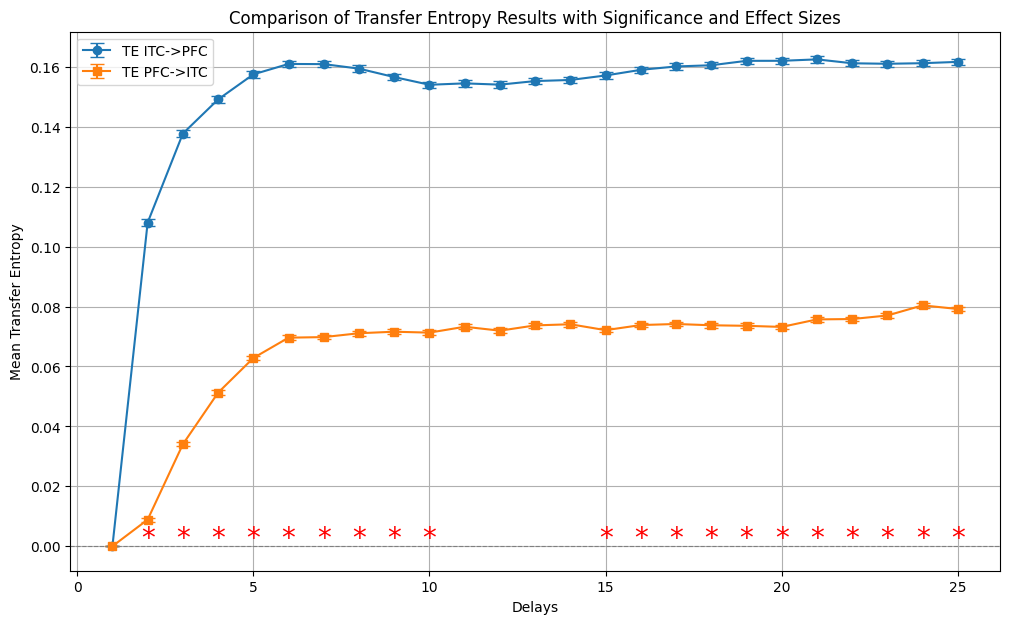

In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulate example data (replace this with your actual data)
np.random.seed(42)
matrix1 = TE_values_it_pfc
matrix2 = TE_values_pfc_it

# Calculate mean and standard error across neurons and stimuli
means1 = matrix1.mean(axis=(1, 2))  # Mean across neurons and stimuli for matrix1
means2 = matrix2.mean(axis=(1, 2))  # Mean across neurons and stimuli for matrix2
std_err1 = matrix1.std(axis=(1, 2), ddof=1) / np.sqrt(matrix1.shape[1] * matrix1.shape[2])  # SE for matrix1
std_err2 = matrix2.std(axis=(1, 2), ddof=1) / np.sqrt(matrix2.shape[1] * matrix2.shape[2])  # SE for matrix2

# Perform Wilcoxon test for each delay
p_values = []
effect_sizes = []
for delay in range(matrix1.shape[0]):
    data1 = matrix1[delay].flatten()
    data2 = matrix2[delay].flatten()
    differences = data1 - data2

    # Check if all differences are zero
    if np.all(differences == 0):
        p_values.append(1.0)  # No difference
        effect_sizes.append(0.0)
    else:
        _, p_val = stats.wilcoxon(data1, data2, alternative='two-sided', zero_method='pratt')
        effect_size = np.abs(data1.mean() - data2.mean()) / np.std(np.concatenate((data1, data2)))
        p_values.append(p_val)
        effect_sizes.append(effect_size)

# Plot results
delays = np.arange(1, 26)  # Delays (1 to 25)
plt.figure(figsize=(12, 7))

# Plot mean and error bars for Matrix 1
plt.errorbar(delays, means1, yerr=std_err1, label='TE ITC->PFC', fmt='-o', capsize=5)

# Plot mean and error bars for Matrix 2
plt.errorbar(delays, means2, yerr=std_err2, label='TE PFC->ITC', fmt='-s', capsize=5)

# Add a horizontal line at zero
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# Annotate significant p-values at zero
for i, (p, es) in enumerate(zip(p_values, effect_sizes)):
    if p < 0.05:
        plt.text(delays[i], 0, '*', ha='center', color='red', fontsize=20)

# Add labels, title, and legend
plt.title('Comparison of Transfer Entropy Results with Significance and Effect Sizes')
plt.xlabel('Delays')
plt.ylabel('Mean Transfer Entropy')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
